# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction

The dataset we’re using in this project contains data derived from tens of thousands of complaints against police officers in the city of New York. The document containing the data is composed of 33,358 complaints filed, meaning 33,358 observations, with 27 features/columns with regards to each complaint. The data given contains a plethora of attributes such as the complaint ID, the receiving and closing date of the complaints, as well as officer rank, first and last name, ethnicity, gender, age, and a plethora of characteristics of the member of service (frequently abbreviated as MOS). Most importantly, there is information regarding the allegation of the accuser, as well as the result, which is key information in conducting analyses. 

Based on the data given to us, and the variety of attributes of the MOS as well as each individual [complaint], we explore the following question: \
__Does the length that the complaint is open depend on ethnicity/age/gender?__

The answer to this question is dependent on the data we are given; because we are given three key features (ethnicity, age, and gender), and we can calculate the time elapsed in each case, we can come up with an answer to our question. 

However, because our dataset contains missing and unruly data, we must first perform data cleaning/preprocessing, and exploratory data analysis on our data. This helps to derive a baseline/guideline for our analysis regarding any potential association/correlation between complaint length and ethnicity/age/gender. Finally, after obtaining a tidy, clean dataset, we will implement multiple statistical techniques, such as hypothesis tests and use test statistics such as the Kolmogorov-Smirnov test statistic.


### Cleaning and EDA
In order to perform our data pre-processing, exploratory data analysis, and hypothesis testing, we imported our dataset as a csv file. After going over the raw dataset, we understand that there is a significant amount of data cleaning required to make this dataset usable. In order to make it easier to clean and process, we first drop the majority of the columns, i.e. the columns that are irrelevant to the main question we are answering. We find the column types and the number of null values in each column in order to better understand any holes in our data. Because our question relates to the length of a complaint we perform multiple operations on the data we are given. We combine the month and year columns for complaint received and closed, and create two new columns with datetime objects. As we require the elapsed time, we take the difference of these columns, and convert the values to the number of days elapsed, for the sake of simplicity. We modify the column that contains the result of the case/complaint (board_disposition), and in the end that column contains the values “denied” or “success”. We also find that quite a few categorical columns contain null, or np.NaN values (such as gender), and a few quantitative columns contain values that are incorrect (such as negative age values), and we take care of those values as well. 

After completing the cleaning of the dataset, we performed univariate and bivariate analysis of our data. Since we are analyzing the relationship between complaint time and ethnicity, age, and gender, we ensure to explore that data visually. We start by find the proportion of each unique value in the gender column, and plotting the genders and their mean complaint times. We then plot solely the male and female genders in a bar chart, as we are using these two genders for our analysis later on. We repeat this same process for ethnicities, and plot the black mean complaint times against the hispanic mean complaint times, as we are using these two different ethnicities for our analysis later on. While we don’t use age in our analysis, we plot the chart using twelve, then nine bins, and notice that there is some skew in the higher age groups. After completing our univariate analysis, we perform some trivial bivariate analysis. We look at statistical tables for complainant gender, and complainant ethnicities. In both tables, we find some key statistics, such as mean, median, and standard deviation for all the genders and ethnicities (separately). From the tables we come up with some conclusions using the “eye test”, but to make a more thorough conclusion, we must perform analysis first.


### Assessment of Missingness
When looking at missingness, we particularly care only about a handful of columns- complainant gender, ethnicity, and age at the time of incident, as those are the columns used in our hypothesis testing. However, when we generate statistics for the missing values, we notice that the majority of the null values exist in the three columns that we are looking to analyze. In fact, more than 72% of the rows with missing data contain null/missing values for those three columns! Because of this large overlap in missing values, we can conclude that our missing is not NMAR. If we were to guess why there is such a large overlap in missing values, our best guess (using our knowledge of the world) is that minorities tend not to report their ethnicities in fear that their cases will get dismissed or will take abnormally long. 

Because the primary focus of our analysis is with regards to gender (male vs female complaint times), we perform a Kolmogorov–Smirnov [permutation] test. Our null hypothesis is that the distributions of complaint length are the same when gender data exists and is missing, and our alternative is that the distributions are different. In conducting this test, we find that the p-value generated by this KS test is 0.0, indicating that we reject the null hypothesis. This means that there is a dependency between the gender and complaint time, which we dive deeper into in our hypothesis testing section. 

Although we completed this KS-test, we must still use another permutation test to find if the __missingness__ in the gender column is dependent on the complaint length. Hence, we use TVD (total variation distance) to perform a permutation test, which outputs a p-value of 0.0, indicating that missingness of gender is dependent on complaint length. Overall, after performing two permutation tests (KS statistic and TVD), we find that missingness of the gender (the primary feature we analyze in this project) dependent on complaint length using missing/null and existing values. So, we can conclude that our missingness is indeed MAR, as the missingness is not explainable by the data we observe. 


### Hypothesis Test
We created two hypothesis tests to determine whether complaint length is dependent on two different factors- gender, and ethnicity. We used the difference of means test statistic, as it measures the difference between mean values of two difference groups. 

1) Regarding gender, we first clean our data to include two primary genders- male and female. We found the average complaint time for each gender, then use difference of means to calculate a test statistic. We then shuffle the elapsed times and run thousands of simulations to come up with a list of test statistics. The result of our hypothesis test is the mean across the list of test statistics. 

2) Regarding ethnicity, we first clean our data to include two primary ethnicities- white and black. We find the average complaint time for each ethnicity, then use difference of means to calculate a test statistic. We then shuffle the elapsed times and run thousands of simulations to come up with a list of test statistics. The result of our hypothesis test is the mean across the list of test statistics. 

The permutation test that we perform on the two primary genders chosen shows that the distributions of the male complaint lengths and female complaint lengths are different, meaning that the complaint length is dependent on gender. The same can be said regarding the permutation test performed on the two ethnicities (white and black); the complaint length is dependent on the ethnicity as well. 

Overall, we were able to answer the question we decided to examine, and we came to a conclusion that complaint length is dependent on the complainant gender and/or ethnicity to the extent of our analysis.

# Code

### Cleaning and EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
path = os.path.join("data", "allegations_202007271729.csv")
df = pd.read_csv(path)
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [3]:
df.describe()

,unique_mos_id,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,6451.608819,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,7945.641596,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,0.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,1089.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,3691.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,7155.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,31977.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [4]:
df = df.drop(["first_name", "last_name", "command_now", "shield_no", "command_at_incident", "rank_abbrev_incident", "rank_abbrev_incident", "rank_abbrev_now",  "rank_incident", "fado_type", "precinct", "contact_reason", "outcome_description", "allegation"], axis = 1)

In [5]:
df.isnull().sum(axis = 0)

unique_mos_id                  0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
rank_now                       0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
board_disposition              0
dtype: int64

In [6]:
df.dtypes

unique_mos_id                 int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
rank_now                     object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
board_disposition            object
dtype: object

In [7]:
df["date_acquired"] = df["year_received"].apply(str) + ", " + df["month_received"].apply(str)
df["date_acquired"] = df["date_acquired"].apply(pd.to_datetime)


df["date_closed"] = df["year_closed"].apply(str) + ", " + df["month_closed"].apply(str)
df["date_closed"] = df["date_closed"].apply(pd.to_datetime)

In [8]:
df["elapsed_time (days)"] = df["date_closed"] - df["date_acquired"]
df["elapsed_time (days)"] = df["elapsed_time (days)"].apply(lambda i: i.days)
df.head()

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,rank_now,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,board_disposition,date_acquired,date_closed,elapsed_time (days)
0,10004,42835,7,2019,5,2020,Police Officer,Hispanic,M,32,Black,Female,38.0,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305
1,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274
2,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274
3,10007,26146,7,2012,9,2013,Police Officer,White,M,25,Black,Male,45.0,Substantiated (Charges),2012-07-01,2013-09-01,427
4,10009,40253,8,2018,2,2019,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184


In [9]:
df["board_disposition"].unique()

array(['Substantiated (Command Lvl Instructions)',
       'Substantiated (Charges)', 'Substantiated (Command Discipline A)',
       'Substantiated (Formalized Training)', 'Unsubstantiated',
       'Exonerated', 'Substantiated (Command Discipline B)',
       'Substantiated (Instructions)',
       'Substantiated (Command Discipline)',
       'Substantiated (No Recommendations)',
       'Substantiated (MOS Unidentified)'], dtype=object)

In [10]:
df["complaint_result"] = df["board_disposition"].apply(lambda i: "Denied" if "Substantiated" in i else "Success")
df["complaint_result"]

0         Denied
1         Denied
2         Denied
3         Denied
4         Denied
          ...   
33353    Success
33354    Success
33355     Denied
33356     Denied
33357     Denied
Name: complaint_result, Length: 33358, dtype: object

In [11]:
def fix_ages(temp):
    temp["complainant_age_incident"] = temp["complainant_age_incident"].apply(lambda i: np.NaN if i < 0 else i)
    return temp
    
df = fix_ages(df)

In [12]:
print(list(df["mos_gender"].unique()))
print(list(df["mos_ethnicity"].unique()))
print(list(df["board_disposition"].unique()))
print(list(df["complainant_gender"].unique()))
print(list(df["complainant_ethnicity"].unique()))

['M', 'F']
['Hispanic', 'White', 'Black', 'Asian', 'American Indian']
['Substantiated (Command Lvl Instructions)', 'Substantiated (Charges)', 'Substantiated (Command Discipline A)', 'Substantiated (Formalized Training)', 'Unsubstantiated', 'Exonerated', 'Substantiated (Command Discipline B)', 'Substantiated (Instructions)', 'Substantiated (Command Discipline)', 'Substantiated (No Recommendations)', 'Substantiated (MOS Unidentified)']
['Female', 'Male', nan, 'Transman (FTM)', 'Not described', 'Transwoman (MTF)', 'Gender non-conforming']
['Black', nan, 'White', 'Asian', 'Refused', 'Hispanic', 'Unknown', 'Other Race', 'American Indian']


In [13]:
df["complainant_gender"] = df["complainant_gender"].replace({"Not described": np.NaN})
df["complainant_ethnicity"] = df["complainant_ethnicity"].replace({"Refused": np.NaN, "Unknown": np.NaN})

### Univariate Analysis

In [14]:
d = df.groupby("complainant_gender").count()["month_closed"]
percent = d / d.sum()
pd.DataFrame().assign(count = d, proportion = percent)

,count,proportion
complainant_gender,,
Female,5021,0.172507
Gender non-conforming,2,0.000069
Male,24058,0.826565
Transman (FTM),5,0.000172
Transwoman (MTF),20,0.000687


<AxesSubplot:title={'center':'elapsed time and gender'}, ylabel='complainant_gender'>

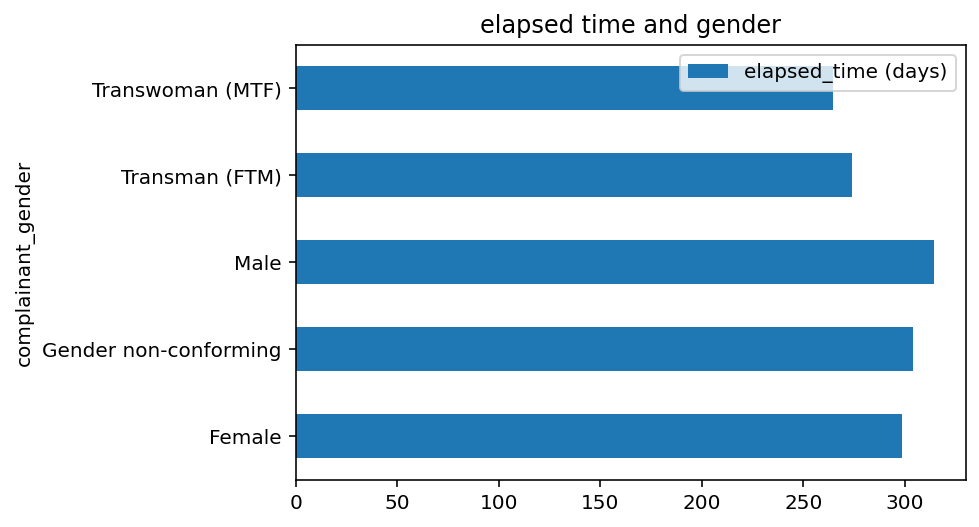

In [15]:
gender = df[['complainant_gender','elapsed_time (days)']]
gender_grouped = gender.groupby('complainant_gender').mean()
gender_grouped.plot(kind='barh', title='elapsed time and gender')

Initially, we plot the genders and their respective average complaint times, and we notice that males have the highest mean complaint time (in days elapsed), while transwoman and transman are on the lower side of it.

<AxesSubplot:title={'center':'elapsed time and gender'}, ylabel='complainant_gender'>

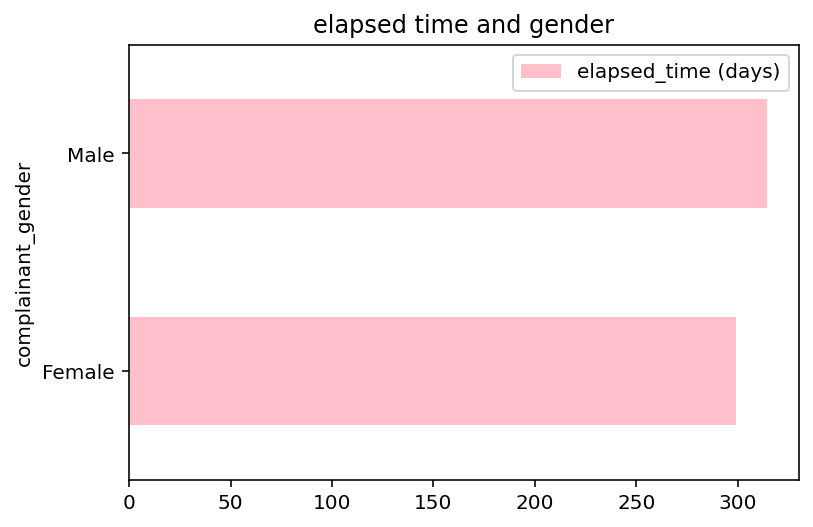

In [16]:
M_F = df[['complainant_gender','elapsed_time (days)']]
M_F= M_F[(M_F['complainant_gender']=='Male') | (M_F['complainant_gender']=='Female')]
M_F = M_F.groupby('complainant_gender').mean()
M_F.plot(kind='barh', title='elapsed time and gender', color = 'pink')

We decide to narrow our bar charts down, and look at male and female elapsed times, as these are the two genders that we want to use in our analysis later. We see that males have a higher mean complaint time than females.

In [17]:
d = df.groupby("complainant_ethnicity").count()["month_closed"]
percent = d / d.sum()
pd.DataFrame().assign(count = d, proportion = percent)

,count,proportion
complainant_ethnicity,,
American Indian,64,0.002319
Asian,532,0.019280
Black,17114,0.620207
Hispanic,6424,0.232804
Other Race,677,0.024534
White,2783,0.100855


<AxesSubplot:title={'center':'elapsed time and ethnicity'}, ylabel='complainant_ethnicity'>

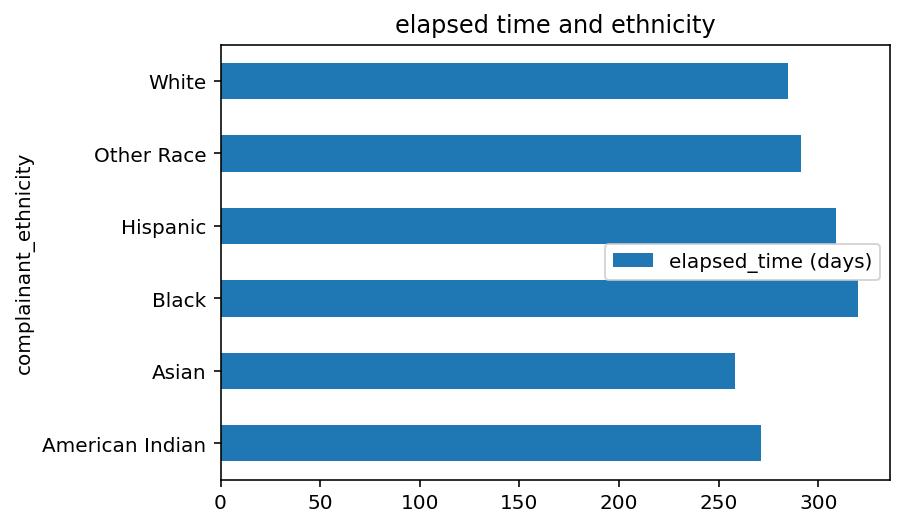

In [18]:
ethnicity = df[['complainant_ethnicity','elapsed_time (days)']]
ethnicity_grouped = ethnicity.groupby('complainant_ethnicity').mean()
ethnicity_grouped.plot(kind='barh', title='elapsed time and ethnicity')

Similar to gender, we plot the mean complaint time (in elapsed days) for all the ethnicities. We notice that blacks and hispanics have the two highest complaint times, while Asians and American Indians, as well as Whites have a lower complaint time. We can later find the specifics of these numbers in our bivariate analysis.

<AxesSubplot:title={'center':'elapsed time and ethincity'}, ylabel='complainant_ethnicity'>

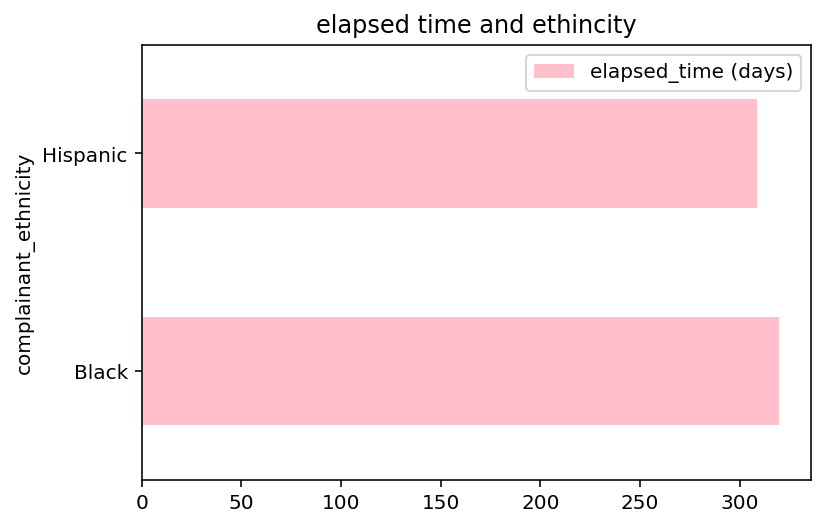

In [19]:
bh = df[['complainant_ethnicity','elapsed_time (days)']]
bh = bh[(bh['complainant_ethnicity']=='Black') | (bh['complainant_ethnicity']=='Hispanic')]
bh = bh.groupby('complainant_ethnicity').mean()
bh.plot(kind='barh', title='elapsed time and ethincity', color = 'pink')

Once again, we decide to narrow our bar charts down, and look at hispanic and black elapsed times, as these are the two ethnicities that we want to use in our analysis later. We see that black individuals have a higher mean complaint time than hispanic individuals.

<AxesSubplot:title={'center':'elapsed time and age'}, ylabel='complainant_age_incident'>

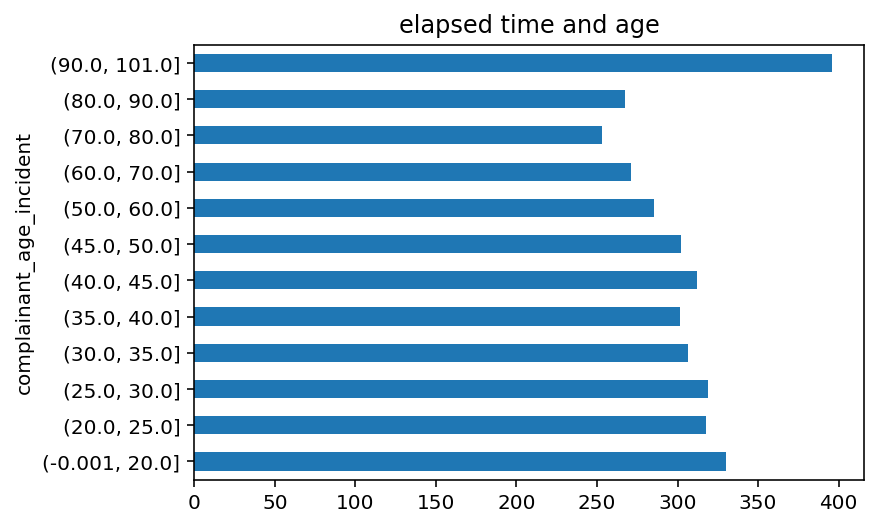

In [20]:
age = df[['complainant_age_incident','elapsed_time (days)']]
age_grouped = age.groupby('complainant_age_incident')
bins = [0, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 101]
temp = age.groupby(pd.cut(age['complainant_age_incident'], bins=bins, include_lowest= True))['elapsed_time (days)'].mean()
temp.plot(kind='barh', title='elapsed time and age')

We designate the complaints into twelve different bins, grouped based on complainant age, and we plot the mean complaint time as such. We notice that complainants in the highest age group, 90+ years old, take the longest time to have their complaints resolved, while the remainder of the age groups have no significant or shocking difference in averages.

<AxesSubplot:title={'center':'elapsed time and age'}, ylabel='complainant_age_incident'>

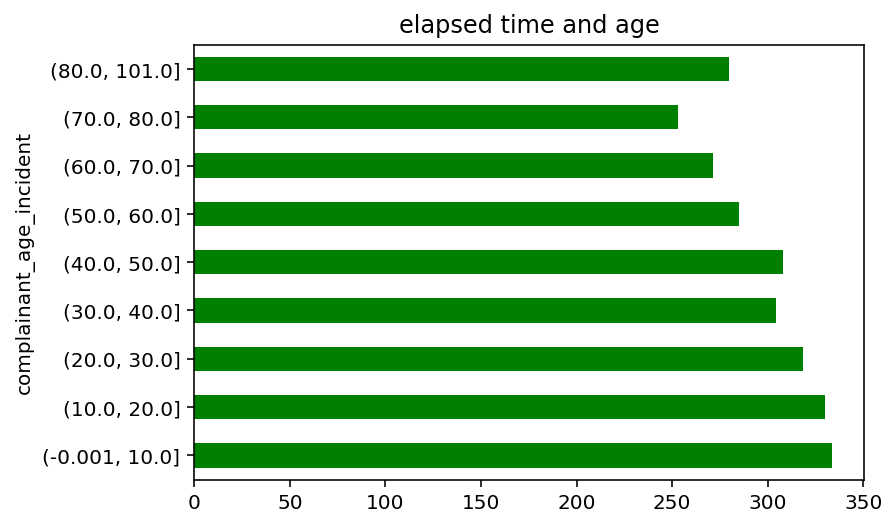

In [21]:
age = df[['complainant_age_incident','elapsed_time (days)']]
age.groupby('complainant_age_incident').count()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 101]
cut = age.groupby(pd.cut(age['complainant_age_incident'], bins = bins, include_lowest= True))['elapsed_time (days)'].mean()
cut.plot(kind='barh', title='elapsed time and age', color = 'green')

We then plot the same bar plot, but this time only use nine bins instead of twelve. We notice that the age group 80+ years old is no longer the largest like the previous bar chart, which suggests that the 90+ age group are outliers. The remainder of the chart suggests that we require finer analysis, and cannot eyeball the data any further.

### Bivariate Analysis

We perform bivariate analysis between two sets of variables: complaint length and complainant gender, and complaint length and complainant ethnicity.

In [22]:
pd.DataFrame(df.groupby("complainant_gender").aggregate({"elapsed_time (days)": [np.mean, np.median, np.std]}))

elapsed_time (days)                   
                                     mean median         std
complainant_gender                                          
Female                         298.834694  275.0  134.289715
Gender non-conforming          304.000000  304.0    0.000000
Male                           314.202427  304.0  143.507623
Transman (FTM)                 274.000000  334.0   82.158384
Transwoman (MTF)               264.800000  212.0  129.339455

In [23]:
pd.DataFrame(df.groupby("complainant_ethnicity").aggregate({"elapsed_time (days)": [np.mean, np.median, np.std]}))

elapsed_time (days)                   
                                     mean median         std
complainant_ethnicity                                       
American Indian                271.093750  273.0  108.618558
Asian                          258.345865  215.0  125.066539
Black                          320.058607  305.0  147.757478
Hispanic                       308.947385  304.0  133.407104
Other Race                     291.090103  304.0  124.401606
White                          284.872080  273.0  128.375707

When looking at these two aggregations at first glance, we come to an understanding that females may have a smaller complaint length than males do. With regards to ethnicity, we can notice that black individuals have a longer complaint time than hispanic individuals.  For both ethnicity and gender, we use the mean and median, and notice they are higher for black and male than for hispanic and female (respectively). 

### Assessment of Missingness

In [24]:
df

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,rank_now,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,board_disposition,date_acquired,date_closed,elapsed_time (days),complaint_result
0,10004,42835,7,2019,5,2020,Police Officer,Hispanic,M,32,Black,Female,38.0,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305,Denied
1,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274,Denied
2,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274,Denied
3,10007,26146,7,2012,9,2013,Police Officer,White,M,25,Black,Male,45.0,Substantiated (Charges),2012-07-01,2013-09-01,427,Denied
4,10009,40253,8,2018,2,2019,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,35671,8,2016,2,2017,Sergeant,White,M,36,Asian,Male,21.0,Unsubstantiated,2016-08-01,2017-02-01,184,Success
33354,9992,35671,8,2016,2,2017,Sergeant,White,M,36,Asian,Male,21.0,Unsubstantiated,2016-08-01,2017-02-01,184,Success
33355,9992,35671,8,2016,2,2017,Sergeant,White,M,36,Asian,Male,21.0,Substantiated (Formalized Training),2016-08-01,2017-02-01,184,Denied
33356,9992,35671,8,2016,2,2017,Sergeant,White,M,36,Asian,Male,21.0,Substantiated (Formalized Training),2016-08-01,2017-02-01,184,Denied


In [25]:
df.isnull().sum()

unique_mos_id                  0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
rank_now                       0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       5764
complainant_gender          4252
complainant_age_incident    4818
board_disposition              0
date_acquired                  0
date_closed                    0
elapsed_time (days)            0
complaint_result               0
dtype: int64

In [26]:
num_nulls = ((df["complainant_gender"].isnull()) & (df["complainant_ethnicity"].isnull()) & (df["complainant_age_incident"].isnull())).sum()
num_nulls

4156

In [27]:
#MAR
df.isnull().mean()

unique_mos_id               0.000000
complaint_id                0.000000
month_received              0.000000
year_received               0.000000
month_closed                0.000000
year_closed                 0.000000
rank_now                    0.000000
mos_ethnicity               0.000000
mos_gender                  0.000000
mos_age_incident            0.000000
complainant_ethnicity       0.172792
complainant_gender          0.127466
complainant_age_incident    0.144433
board_disposition           0.000000
date_acquired               0.000000
date_closed                 0.000000
elapsed_time (days)         0.000000
complaint_result            0.000000
dtype: float64

__Permutation Test #1__ 

This permutation test checks if the distribution of complaint length is the same for missing gender data and existing gender data. 

Null hypothesis: Same distribution of complaint length for missing gender data and existing gender data.

Alternate hypothesis: Different distribution of complaint length for missing gender data and existing gender data. 

null_vals
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: elapsed_time (days), dtype: object

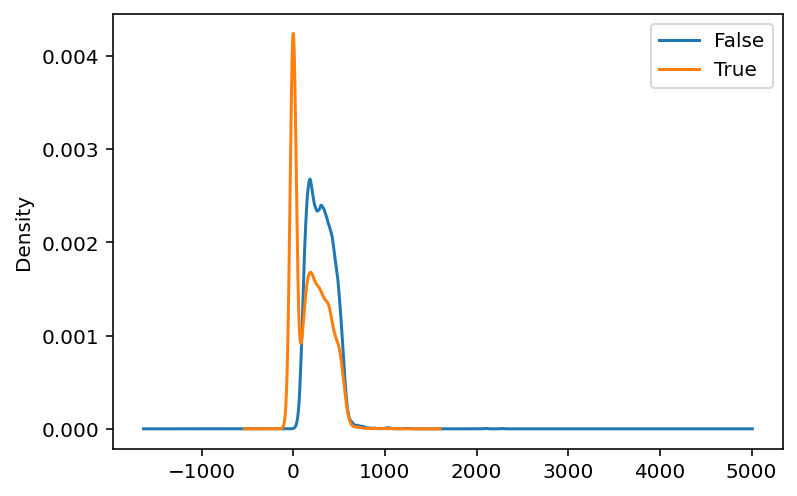

In [28]:
tester = df[['complainant_gender','elapsed_time (days)']].copy()
tester["null_vals"] = tester["complainant_gender"].isnull()
tester.groupby("null_vals")["elapsed_time (days)"].plot(kind = "kde", legend = "True")

In [29]:
def null_ks(temp, col):
    return ks_2samp(temp.loc[temp["complainant_gender"].isnull(), col], temp.loc[temp["complainant_gender"].notnull(), col]).statistic

In [30]:
ks_val = null_ks(tester, "elapsed_time (days)")
print("the single KS-stat is:", ks_val)

stat_list = []
length_vals = tester["elapsed_time (days)"].values
gender_vals = tester["complainant_gender"].values

temp = pd.DataFrame()
temp["elapsed_time (days)"] = length_vals
for i in range(1000):
    shuffled = np.random.permutation(gender_vals)
    temp["complainant_gender"] = shuffled
    stat_list.append(null_ks(temp, "elapsed_time (days)"))

the single KS-stat is: 0.3622315978854078


Text(0.5, 1.0, 'Missingness Permutation (KS) Test')

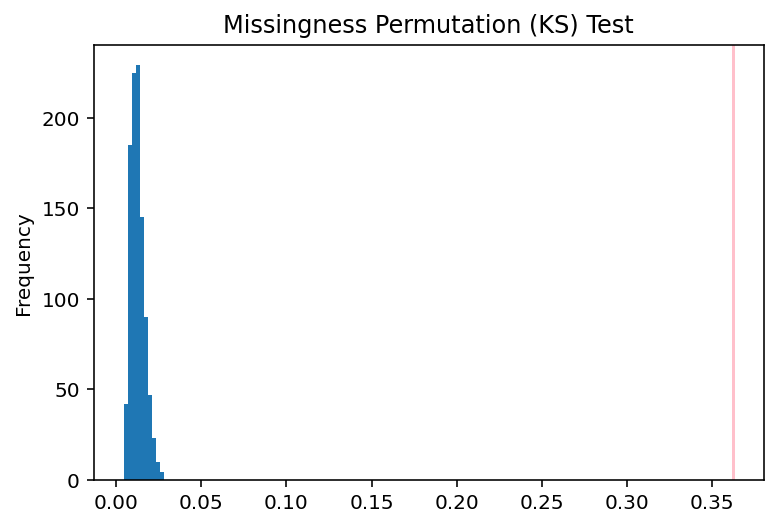

In [31]:
pd.Series(stat_list).plot(kind = "hist")
plt.axvline(ks_val, color = "pink")
plt.title("Missingness Permutation (KS) Test")

In [32]:
print("The mean of the p-values is: " + str((pd.Series(stat_list) >= ks_val).mean()))
#Reject the null hypothesis, i.e. there is a different distribution of complaint length for missing and other data

The mean of the p-values is: 0.0


Because we are using a significance level of 0.05, we can reject the null hypothesis; i.e. we conclude that the complaint lengths for missing gender data and existing gender data are not from the same distribution. Hence, we understand that missingness is dependent on the complaint length.

__Permutation Test #2__ 

This permutation test checks if the missingness of complainant gender has a dependency on the complaint result. 

Null hypothesis: Same distribution of complaint result for missing and existing gender data.

Alternate hypothesis: Different distribution of complaint result for missing and existing gender data.

In [33]:
df.head()

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,rank_now,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,board_disposition,date_acquired,date_closed,elapsed_time (days),complaint_result
0,10004,42835,7,2019,5,2020,Police Officer,Hispanic,M,32,Black,Female,38.0,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305,Denied
1,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274,Denied
2,10007,24601,11,2011,8,2012,Police Officer,White,M,24,Black,Male,26.0,Substantiated (Charges),2011-11-01,2012-08-01,274,Denied
3,10007,26146,7,2012,9,2013,Police Officer,White,M,25,Black,Male,45.0,Substantiated (Charges),2012-07-01,2013-09-01,427,Denied
4,10009,40253,8,2018,2,2019,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184,Denied


In [34]:
def calc_tvd(s):
    return s.diff(axis = 1).abs().sum().iloc[-1]/2

def cross_table(temp, col):
    t = temp.copy()
    sol = t.pivot_table(index = [col], columns = ["is_null"], aggfunc = "size")
    return sol / sol.sum()

In [35]:
tester = df[["complainant_gender", "board_disposition"]].copy()
tester["is_null"] = tester["complainant_gender"].isnull()
sol = cross_table(tester, "board_disposition")
tvd = calc_tvd(sol)

stats = list()
n = 1000
temp = pd.DataFrame()
temp["board_disposition"] = tester["board_disposition"].values
for i in range(n):
    shuffled = np.random.permutation(tester["is_null"].values)
    temp["is_null"] = shuffled
    sol = cross_table(temp, "board_disposition")
    stats.append(calc_tvd(sol))

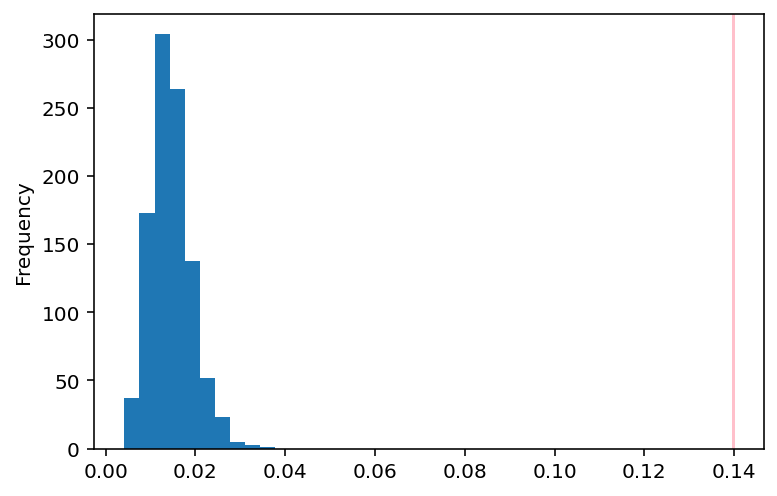

In [36]:
pd.Series(stats).plot(kind = "hist")
plt.axvline(tvd, color = "pink")

In [37]:
print("tvd value: " + str(tvd))
print("p-value: " + str((pd.Series(stats) >= tvd).mean()))

tvd value: 0.13974102283805284
p-value: 0.0


Because we are using a significance level of 0.05, we can reject the null hypothesis; i.e. we conclude that missingness and existing gender values aren't from the same distribution, meaning that missingness is known to be dependent on a successful complaint. 

### Hypothesis Test

Null Hypothesis: The male complaint lengths and female complaint lengths are the same.\
Alternate Hypothesis: The male complaint lengths and female complaint lengths are different.\
Test Statistic: difference of means\
Significance Level: 0.05

Text(0.5, 1.0, 'Male and Female Kernel Density Estimation')

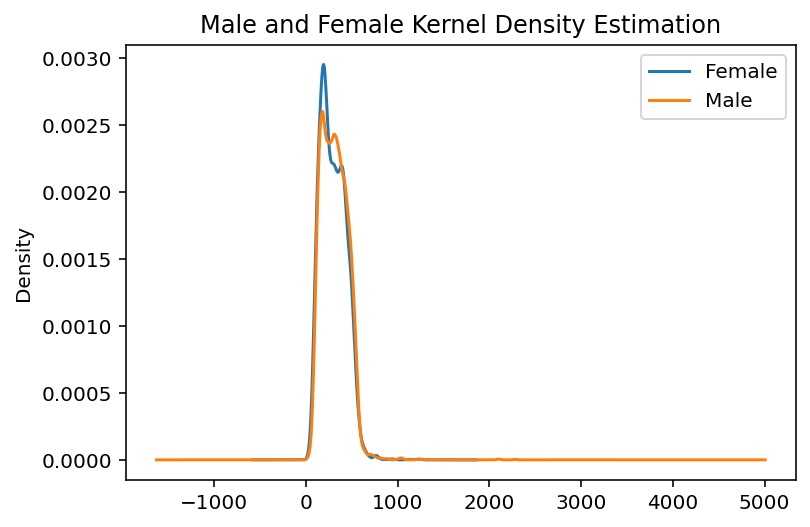

In [38]:
#Permutation test on only male + female, as we have the largest sample sizes for these two genders
double_gender = ((df["complainant_gender"] == "Female") | (df["complainant_gender"] == "Male"))
double_gender = df[double_gender].copy()
double_gender.groupby("complainant_gender")["elapsed_time (days)"].plot(kind = "kde", legend = "True")
plt.title("Male and Female Kernel Density Estimation")

In [39]:
tester = df.groupby("complainant_gender").mean()["elapsed_time (days)"]
observed_diff = tester.loc["Male"] - tester.loc["Female"]

temp_df = pd.DataFrame()
temp_df["complainant_gender"] = df["complainant_gender"]
temp_df["elapsed_time (days)"] = df["elapsed_time (days)"]
diffs = list()
n = 1000

for i in range(n):
    samp = temp_df["elapsed_time (days)"].sample(frac = 1, replace = False).reset_index(drop = True)
    means = temp_df[["complainant_gender"]].assign(time = samp).groupby("complainant_gender").mean()["time"]
    diffs.append(means.loc["Male"] - means.loc["Female"])
    
#print(observed_diff)
print("pval = " + str(np.count_nonzero(diffs >= observed_diff) / n))

pval = 0.0


Null Hypothesis: The complaint lengths of black individuals and hispanic individuals are the same.\
Alternate Hypothesis: The complaint lengths of black individuals and hispanic individuals are different.\
Test Statistic: difference of means\
Significance Level: 0.05

Text(0.5, 1.0, 'Black and Hispanic Kernel Density Estimation')

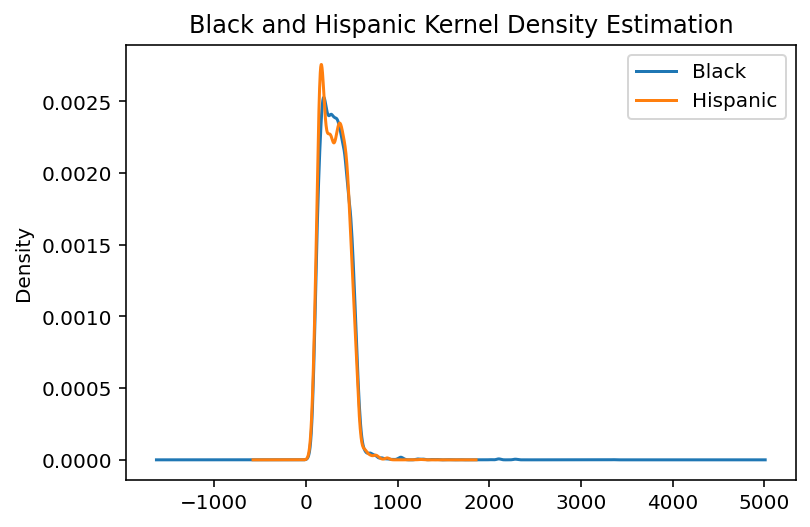

In [40]:
#Permutation test on only black + hispanic, as we have chosen those two ethnicities
double_gender = ((df["complainant_ethnicity"] == "Black") | (df["complainant_ethnicity"] == "Hispanic"))
double_gender = df[double_gender].copy()
double_gender.groupby("complainant_ethnicity")["elapsed_time (days)"].plot(kind = "kde", legend = "True")
plt.title("Black and Hispanic Kernel Density Estimation")

In [41]:
tester = df.groupby("complainant_ethnicity").mean()["elapsed_time (days)"]
observed_diff = tester.loc["Black"] - tester.loc["Hispanic"]

temp_df = pd.DataFrame()
temp_df["complainant_ethnicity"] = df["complainant_ethnicity"]
temp_df["elapsed_time (days)"] = df["elapsed_time (days)"]
diffs = list()
n = 1000

for i in range(n):
    samp = temp_df["elapsed_time (days)"].sample(frac = 1, replace = False).reset_index(drop = True)
    means = temp_df[["complainant_ethnicity"]].assign(time = samp).groupby("complainant_ethnicity").mean()["time"]
    diffs.append(means.loc["Black"] - means.loc["Hispanic"])
    
#print(observed_diff)
print("pval = " + str(np.count_nonzero(diffs >= observed_diff) / n))

pval = 0.0
